# Introduction 

*\[Machine Learning is a\] field of study that gives computers the ability to learn without being explicitly programmed.* --- Arthur Samuel, 1959

Machine learning has existed for decades; however, until recently, computing power and data storage were too limited to allow machines to effectively solve many problems in the field. 

The amount of data that is being generated is growing at massive amounts and humans are not predisposed to be as reliable andd efficient as computers at handling large amounts of data. 

Machine learning is allowing the development of a model where the data and expected output allow the machine to develope a model without a person giving all the details. 
<img src="images/traditional_vs_ml.png" width=400>


Let us compare the traditional approach to solving a problem such as *classifying email as spam or non-spam.* 

## Programmatic approach

Here is an example of the path we might take to develop this classification:

1. First, we would identify some common phrases in a spam message ("4U", "credit card", "free", "amazing", "one simple trick", ...). We might also identify some other common patterns in sender's name, email's name, domains, ...
2. We would write set of rules (pattern recognition).
3. We would then test our program and likely write more rules
4. This would continue until our program worked well enough.

## ML Approach

1. We take in a large number of emails that have been sorted as *spam* or *not spam*.
2. We define some measurable charateristics of the messages, such as domains, message length, ..
3. We process the emails through a process of the model determining parameters to give the answer.
4. We allow the model to reach an acceptable lvel of accuracy. 


# Machine Learning terminology

There is some terminology that has become the common way to refer to different components of the system.

## Features

_Features_ are the input values for making a model. For instance, the feature set for a model to describe salary offer for a potential new employee may include:
* Years Education
* Degrees completed
* Years Experience in similar positions
* Previous salary
* Previous job location
* Need to fill the position 

The features may be numbers (years education, years experience, ...) or they may be discrete categories (degrees completed). 

## Labels

Labels are quantities or qualities that we are attempting to predict using our model.

## Training Data

This the data that is used to develop the model.

## Testing Data

This is the data used to evaluate the model. 

## Holdout Data

This is data that is not used in either training or testing of the model. This is not always done, but is a good practice when there is enough data. 


# Types of Problems in ML

## Regression

Regression problems are cases where a numeric answer is predicted based on the feature set. As an example, we may predict the cost of an apartment based on the feature set:
* Square footage
* Number of bedrooms
* Number of bathrooms
* Presence of any number of amenities
* Crime rate in the local area
* etc


There are a number of types of regression:
* Simple Linear Regression
* Multiple Linear Regression
* Polynomial Regression
* Support Vector for Regression (SVR)
* Decision Tree Classification
* Random Forest Classification

## Classification

In classification problems, a discrete property or class is determined based on the feature set (which may be discrete or numeric as desired). As an example, we may classify if school will be on *normal schedule*, *delayed schedule*, or *canceled* based on an number of feature:

* Temperature
* Presence of Ice
* Amount Snowfall since midnight on the day
* Number of students within 1 mile
* Number of students within 5 miles
* Number of students with greater than 5 mile distance
* Number of faculty and staff within 1 mile
* Number of faculty and staff within 5 miles
* Number of faculty and staff with greater than 5 mile distance
* Has a state of emergency been declared
* Number of recent reported sicknesses in student age range
* Number of recent reported sicknesses in faculty and staff range.
* etc


# Limitations of Machine Learning

Machine learning programs often fail to deliver expected results, which can occur due to many reasons:

* Lack of Data
* Lack of access to data
* Data bias
* Privacy problems
* Badly chosen tasks and algorithms

Machine Learning is not magical solution. While the goal may be to find hidden patterns and better algorithms, the methdods are still as depend on the failures that plague anthrocentric methods.

# Practical

The problem we will targeting in this example will be the detection of breast cancer. Breast cancer is one of the most common cancers among women worldwide. Early diagonosis of breast coancer can greatly decrease the likelihood of death. However, accurate diagonisis can be a challenge and requires expert analysis, which greatly impacts areas where these experts are in short-supply. 

It would be very beneficial if we can use machine learning techniques to develop an accurate model which can bring expert levels of accuracy to anywhere the models can be used. 

In this workshop, we will use the Wiscosin breast cancer dataset, which is a labeled dataset containing 30 parameters obtained by analysis of fine needle aspirate (FNA) of breast masses.
This dataset has been previously studied by several papers including [Breast Cancer Detection with Reduced Feature Set](https://www.hindawi.com/journals/cmmm/2015/265138/)


Here is a diagram of our plan:
<img src="images/cancer_diagram.png">

## Steps in this project

1. Getting the needed libraries.
2. Getting the data
3. Getting the data into a usable form.
4. Exploring the data.
5. Preparing the data for training.
6. Preparing the training and testing sets
7. Training the model.
8. Testing the model.

## Libraries

Here are the basic libaries that we will use in this notebook for our machine learning workshop. 

In [1]:
!conda env list

# conda environments:
#
ldap_py37                /nv/hp16/cblanton7/.conda/envs/ldap_py37
mygtk                    /nv/hp16/cblanton7/.conda/envs/mygtk
myrenv                   /nv/hp16/cblanton7/.conda/envs/myrenv
pace_mlws_py37        *  /nv/hp16/cblanton7/.conda/envs/pace_mlws_py37
pace_mlws_py37_backup     /nv/hp16/cblanton7/.conda/envs/pace_mlws_py37_backup
pylauncher3_py37         /nv/hp16/cblanton7/.conda/envs/pylauncher3_py37
pylauncher_py27          /nv/hp16/cblanton7/.conda/envs/pylauncher_py27
pytorch_py37             /nv/hp16/cblanton7/.conda/envs/pytorch_py37
qiime2-2020.2            /nv/hp16/cblanton7/.conda/envs/qiime2-2020.2
ribosemap_env            /nv/hp16/cblanton7/.conda/envs/ribosemap_env
sample-py37              /nv/hp16/cblanton7/.conda/envs/sample-py37
base                     /usr/local/pacerepov1/anaconda/anaconda3/2019.03
qiime2-201904            /usr/local/pacerepov1/anaconda/anaconda3/2019.03/envs/qiime2-201904



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
%matplotlib inline

Let us check some information about one of the packages

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution is: {}".format(tf.executing_eagerly()))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.0.0
Eager execution is: True
Keras version: 2.2.4-tf


# Breast Cancer data

In [4]:
from sklearn.datasets import load_breast_cancer # Loading the breast cancer from a standard repositiry within SciKit
cancer = load_breast_cancer()

Now, let's look at the data we have:

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

While that is somewhat human-readable, so let's start to transform it. 

Let's start by getting the name of the fields.

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

We can start to see get some information by looking at one of the components, which contains a description for users of the data 

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

We will look at the labels (ML-terminology) for the dataset.

In [8]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

This is the labels in a code-format. We can see what the meanings of the codes by looking at the 'target_names' field

In [9]:
print(cancer['target_names'])

['malignant' 'benign']


We note that the array is 0-indexed, so that 0 is 'malignant' and 1 is 'benign'. 

The features of the set can be found by looking at the 'features_names'.

In [10]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# DataFrame

We will use a Pandas DataFrame object to make maniplulation of the data easier. 

In [11]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

An issue to be aware of is that TensorFlow does not allow spaces in Feature names, so we will fix that now

In [12]:
for key in df_cancer.keys():
    newkey = key.replace(" ", "_")
    df_cancer.rename(index=str,columns={key:newkey},inplace=True)
print(df_cancer.keys())

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')


In [13]:
df_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [14]:
df_cancer.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# Visualization of the Data

Let's look at the relaitonships between some of the variables, to get some idea of which data are important and which data are redundant. 

We'll use a heatmap, which can be used to visualize correlations. Each square of this heatmap shows the correlation between the variables. Correlation close to -1 shows a strong negative correlation (one variable increases as one decreases) and correlation close to +1 shows a strong postive correlation (both increase together). 

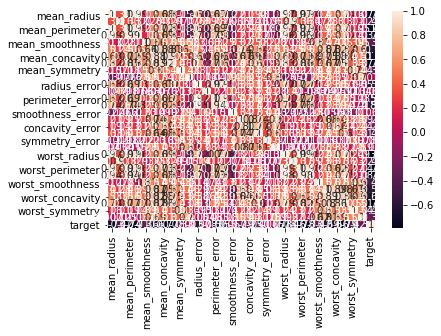

In [15]:
sns.heatmap(df_cancer.corr(),annot=True)

However, the default size can be difficult to view. Let's try to make that a little better. 

(31.5, -0.5)

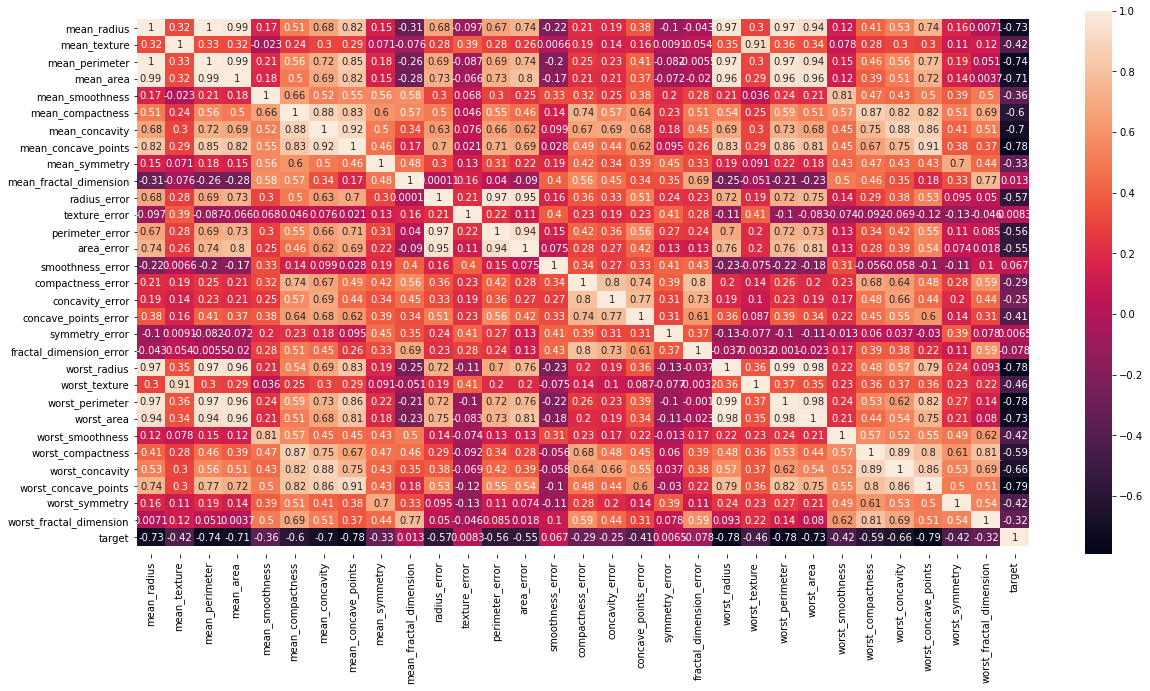

In [16]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_cancer.corr(),annot=True) # This is because of an issue in matplotlib. 
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom+0.5, top-0.5)

# Chosing features to be studied

It is tempting to use all the features in a haphazard way. In our case, we see several parameters, such as the size of the cells to have multiple types of measurements. It is often advanatageous to try to minimize the number of features because of this and computational expense. 

Thinking about this in a mathematical sense, the features do not necessarily form a orthogonal basis set. This can lead to degenerate answers which may complicate the optimization process and either lead to a local extrema or failure of convergence. **This is in general terms of optimization, not strictly ML terms.**

In our case, we will use the mean parameters for a starting point because it reduces the number of features to 5. Inuitively, mean values tend to be a good choice for measuring trends.  

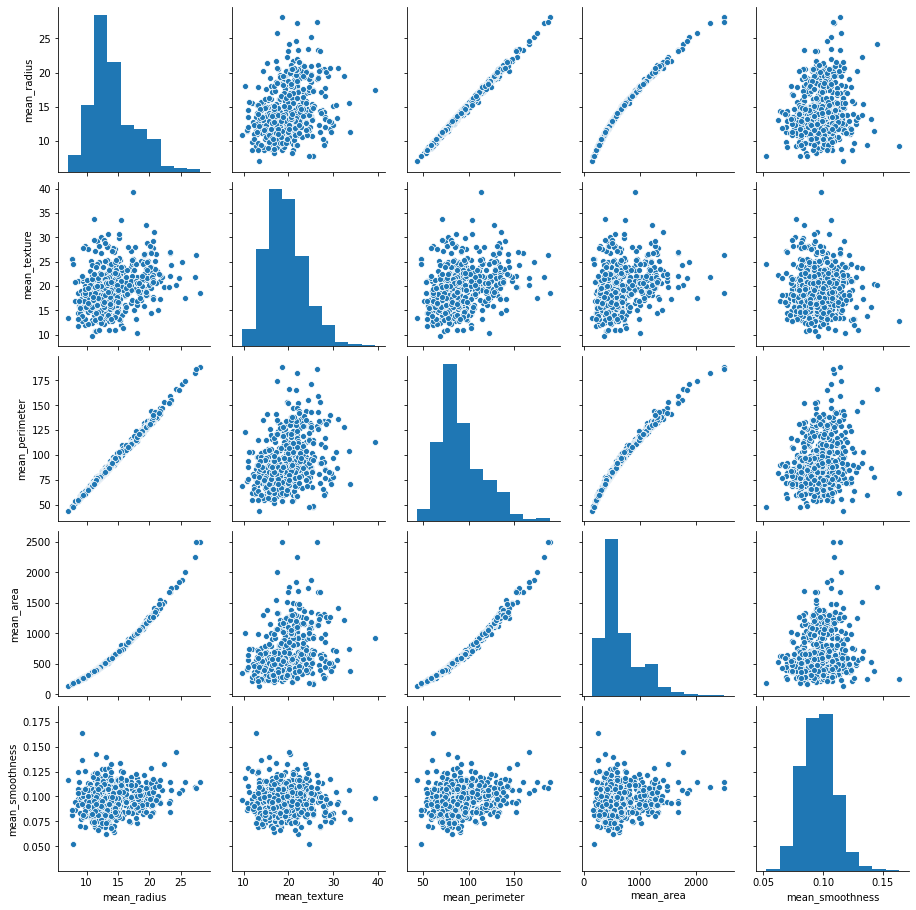

In [17]:
sns.pairplot(df_cancer, vars=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])

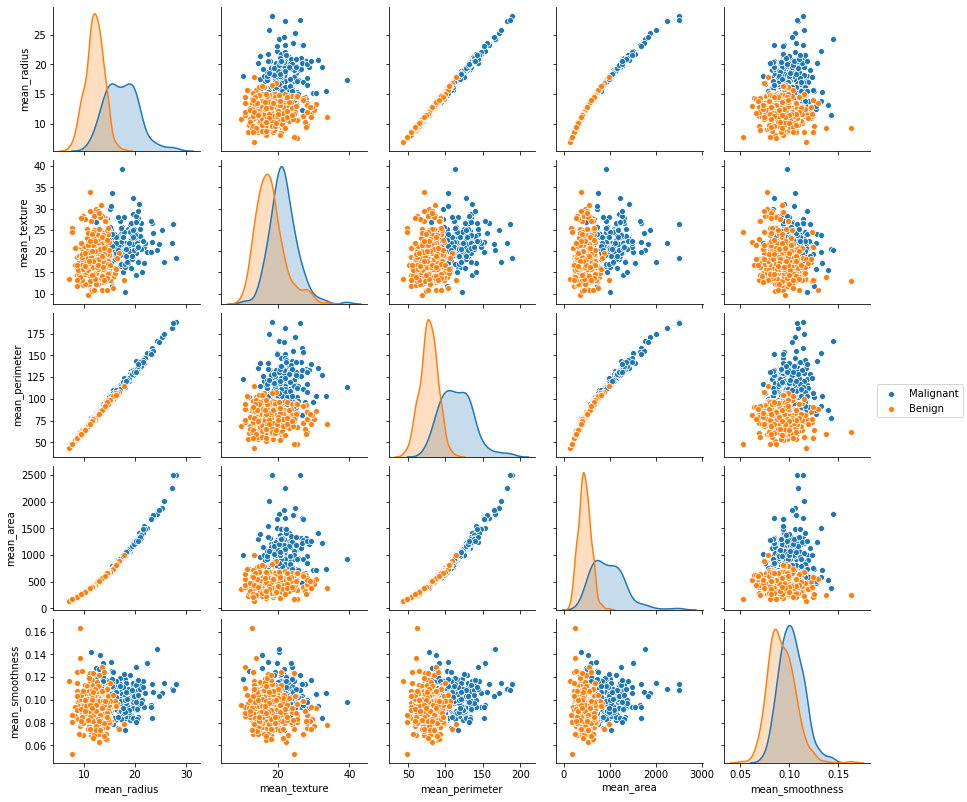

In [18]:
g = sns.pairplot(df_cancer,hue='target', vars=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
# Below is to allow the legend to use words instead of numbers. 
handles = g._legend_data.values()
labels = ['Malignant','Benign'] 
g._legend.remove()
g.fig.legend(handles=handles,labels=labels, loc='center right',ncol=1)
g.fig.subplots_adjust(top=0.92,bottom=0.08,right=0.9)

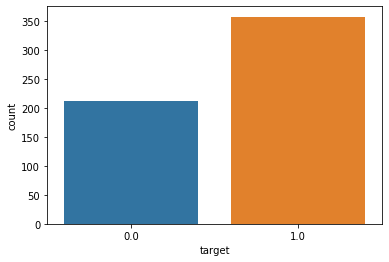

In [19]:
sns.countplot(df_cancer['target'])

In [20]:
features=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
labels=['target']

In [21]:
randomized_data = df_cancer.reindex(np.random.permutation(df_cancer.index))

In [22]:
randomized_data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
379,11.080,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.063670,0.2196,0.07950,...,32.82,91.76,508.1,0.2184,0.93790,0.8402,0.25240,0.4154,0.14030,0.0
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.086910,0.2094,0.05581,...,28.64,170.30,2009.0,0.1353,0.32350,0.3617,0.18200,0.3070,0.08255,0.0
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.023430,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.16200,0.2439,0.06493,0.2372,0.07242,1.0
448,14.530,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.029250,0.1473,0.05746,...,28.39,108.10,830.5,0.1089,0.26490,0.3779,0.09594,0.2471,0.07463,1.0
548,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,...,25.59,69.10,364.2,0.1199,0.09546,0.0935,0.03846,0.2552,0.07920,1.0


In [23]:
total_records = len(randomized_data)
training_set_size_portion = 0.8
training_set_size = int(total_records*training_set_size_portion)
test_set_size = total_records - training_set_size
print(total_records,training_set_size,test_set_size)

569 455 114


In [24]:
# Building the testing features and labels
testing_features = randomized_data.tail(test_set_size)[features].copy()
testing_labels = randomized_data.tail(test_set_size)[labels].copy()

In [25]:
testing_features.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
311,14.61,15.69,92.68,664.9,0.07618
73,13.80,15.79,90.43,584.1,0.10070
368,21.71,17.25,140.90,1546.0,0.09384
402,12.96,18.29,84.18,525.2,0.07351
464,13.17,18.22,84.28,537.3,0.07466


In [26]:
testing_labels.head()

,target
311,1.0
73,0.0
368,0.0
402,1.0
464,1.0


In [27]:
training_features = randomized_data.head(training_set_size)[features].copy()
training_labels = randomized_data.head(training_set_size)[labels].copy()
print(training_features.head())
print(training_labels.head())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
379       11.080         18.83           73.30      361.6          0.12160
218       19.800         21.56          129.70     1230.0          0.09383
554       12.880         28.92           82.50      514.3          0.08123
448       14.530         19.34           94.25      659.7          0.08388
548        9.683         19.34           61.05      285.7          0.08491
     target
379     0.0
218     0.0
554     1.0
448     1.0
548     1.0


In [28]:
feature_columns = [tf.feature_column.numeric_column(key) for key in features]

In [29]:
print(feature_columns)

[NumericColumn(key='mean_radius', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_texture', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_perimeter', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_area', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='mean_smoothness', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


# Choice of Model

There are many models that can be used to attempt to solve the problem of classifying wheter the cancer is benign or malignant. In this example, we will use a neural network; which is a mathematical model that is inspired by how brains use. 

The strength of neural networks has been shown in the ability of these algorithms to excel in certain problems, such as pattern recognition. In the case of this problem, there is a deep pattern that is inside the set of data and the cancer outcome (otherwise, how would the physician's determination be better than a random determination). 

#  Neural Networks

Neural networks are a type of machine learning algorithm that are inspired by neurons in the human brain. Similar to neurons in the brains, neural networks are formed by interconnecting neurons that interact with each other. Each neuron takes input, does some simple alogrithm to it, and then passes an output to the next neuron. 

Let us look at a *perceptron*; that is, a *single layer neural network*. 

<img src='images/perceptron.png'>

The *perceptron* is a mathematical function that takes a set of inputs, performs some operation, and outputs the result. In this case,
$$ y = \sum_{i} w_{i}x{i},$$
where $w_i$ is the weight of the perceptron. The perceptron will have some rule, that will determine what is the output. This may be the detection of a certain feature or the output of some mathematical process. With the *perceptron*, the output is binary (1 or 0). 



## Architecture of neural networks

A neural network consists of 
* An input layer 
* Any number of hidden layers (these are called hidden because the external observe does not see the output)
* An output layer
* A set of weights and bias between each layer $\{w_i\}, \{b_i\}$
* An activation function for each layer, $\sigma$


<img src='images/neural_network_1.png'>

## Training Process

Each iteration of the training process consists of the following steps:
1. Calculating the predicted output $\hat{y}$, known as _*Feedforward*_
2. Updating the weights and biases, known as _*Backpropagation*_

Schematicially, this can be illustated as 
<img src='images/nn_iteration.png'>

### Feedforward

The forward motion is quite simply the calculation of the function in series.

The loss function comes into play at this point, since we must determine the "goodness" of our performance.
There are many possibilities to use for the *loss* function, such as the familar *sum-of-squares error*
$$ \mathrm{loss} = \sum_{i=1}^n (y-\hat{y})^2$$

### Backprogagation 

As we measure the error of our prediction, we can now find a way to use the error to improve the network, if desired. This is termed *backpropagation*. 
we may search the error function in order to update the weights and bias.
One method may be to use the derviative of the loss function to determine the path of greatest decrease as in *gradient descent*.

## Hyperparameters

*Hyperparameters* are the *variables which determine the network structure* and *how the network is trained*. Examples that effect the *learning rate* are *epoch*, *batches*, and *iterations*. 

An *epoch* is when an entire training dataset is passed forward and backward through the network *once*. It is at the end of an epoch that parameters (weights and biases) have updated. In short (batch_size * number_iterations >= number_data)

An *iteration* is the number of *batches* needed to complete one epoch.

In some cases, the dataset will need to be divided into *batches* in order to fit everything in memory in order complete the calculations. For example, you may have 1000 training examples, 


In [30]:
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10], n_classes=2,model_dir='tmp/model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab0a992910>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the Network

We define the training the input function now. 

The function that does this is 

`train_input_fn = tf.estimator.inputs.pandas_input_fn(x=training_features, y=training_labels['target'], num_epochs=15,shuffle=True)`

In this case, we will pass through the data set 15 times, updating the weight and biases based on the loss.
<https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn> for complete documentation of the function.

In [34]:
train_input_fn =  tf.compat.v1.estimator.inputs.pandas_input_fn(x=training_features,y=training_labels['target'],num_epochs=15,shuffle=True)

In [35]:
print(type(training_features['mean_radius']), type(training_labels['target']))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


**Note** If you are reruning the calculation, it may be necessary to clean out the tmp directory.

In [36]:
classifier.train(input_fn=train_input_fn,steps=2000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into tmp/model/model.ckpt.
INFO:tensorflow:loss = 46.50615, step = 0
INFO:tensorflow:Saving checkpoints for 54 into tmp/model/model.ckpt.
INFO:tensorflow:Loss for final step: 12.274656.


# Testing the Model

In [37]:
test_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=testing_features,y=testing_labels['target'],num_epochs=15,shuffle=False)

In [38]:
classifier.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-14T08:17:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-14-08:17:39
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.35964912, accuracy_baseline = 0.6403509, auc = 0.5, auc_precision_rec

{'accuracy': 0.35964912,
 'accuracy_baseline': 0.6403509,
 'auc': 0.5,
 'auc_precision_recall': 0.6403509,
 'average_loss': 11.922251,
 'label/mean': 0.6403509,
 'loss': 11.911443,
 'precision': 0.0,
 'prediction/mean': 2.8521345e-07,
 'recall': 0.0,
 'global_step': 54}

In [39]:
accuracy_score=classifier.evaluate(input_fn=test_input_fn)['accuracy']
print("Accuracy = {}".format(accuracy_score))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-14T08:17:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-14-08:17:46
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.35964912, accuracy_baseline = 0.6403509, auc = 0.5, auc_precision_rec

# Improving the accuracy

Since the accuracy is not very high, let us start to try to improve the accuracy.

A key way to improve the accuracy is to increase the number of hidden layers. 




In [67]:
classifier_v2 = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[20,40,20], n_classes=2,model_dir='tmp/model_2')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model_2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab14b07090>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [69]:
classifer_v2.train(input_fn=train_input_fn,steps=2000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into tmp/model2/model.ckpt.
INFO:tensorflow:loss = 29.188545, step = 0
INFO:tensorflow:Saving checkpoints for 54 into tmp/model2/model.ckpt.
INFO:tensorflow:Loss for final step: 10.446603.


In [70]:
classifer_v2.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-14T08:58:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model2/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-14-08:58:49
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.6403509, accuracy_baseline = 0.6403509, auc = 0.5, auc_precision_rec

{'accuracy': 0.6403509,
 'accuracy_baseline': 0.6403509,
 'auc': 0.5,
 'auc_precision_recall': 0.6403509,
 'average_loss': 10.83947,
 'label/mean': 0.6403509,
 'loss': 10.80898,
 'precision': 0.6403509,
 'prediction/mean': 0.9999727,
 'recall': 1.0,
 'global_step': 54}

**We have improve the accuracy to 0.64 from 0.36** Let's continue by increasing the number of hidden layers as well as the training time. 

In [71]:
classifier_v3 = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[30,50,30], n_classes=2,model_dir='tmp/model_3')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model_3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab740329d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
classifier_v3.train(input_fn=train_input_fn,steps=10000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into tmp/model_3/model.ckpt.
INFO:tensorflow:loss = 52.21256, step = 0
INFO:tensorflow:Saving checkpoints for 54 into tmp/model_3/model.ckpt.
INFO:tensorflow:Loss for final step: 0.6682115.


In [75]:
classifier_v3.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-14T09:02:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tmp/model_3/model.ckpt-54
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-04-14-09:02:43
INFO:tensorflow:Saving dict for global step 54: accuracy = 0.55263156, accuracy_baseline = 0.6403509, auc = 0.44954896, auc_prec

{'accuracy': 0.55263156,
 'accuracy_baseline': 0.6403509,
 'auc': 0.44954896,
 'auc_precision_recall': 0.6069764,
 'average_loss': 0.7196928,
 'label/mean': 0.6403509,
 'loss': 0.71806085,
 'precision': 0.625,
 'prediction/mean': 0.57572985,
 'recall': 0.75342464,
 'global_step': 54}

**We have decrease the accuracy with that.** Let's try something else. 

In [88]:
%rm -rf './tmp/model_4'
classifier_v4 = tf.estimator.DNNClassifier(feature_columns=feature_columns,hidden_units=[10,20,10], n_classes=2,model_dir='tmp/model_4')
classifier_v4.train(input_fn=train_input_fn,steps=50000)
classifier_v4.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tmp/model_4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab762ea090>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run thi

{'accuracy': 0.85087717,
 'accuracy_baseline': 0.6403509,
 'auc': 0.9268292,
 'auc_precision_recall': 0.9474931,
 'average_loss': 0.43094146,
 'label/mean': 0.6403509,
 'loss': 0.43044588,
 'precision': 0.8111111,
 'prediction/mean': 0.59792554,
 'recall': 1.0,
 'global_step': 54}

# Feedback 

<https://gatech.co1.qualtrics.com/jfe/form/SV_55uzMYLufTuiLch>